In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import nltk
import re

In [23]:
df_raw = pd.read_csv(r'data/LinkedinScrape_Data_Indonesia_.csv', sep=';')

In [24]:
df = df_raw.copy()

In [25]:
df.Location.unique()

array(['Lembang, West Java, Indonesia', 'Bandung, East Java, Indonesia',
       'Jakarta, Indonesia', 'Jakarta, Jakarta, Indonesia',
       'Jakarta Metropolitan Area', 'West Jakarta, Jakarta, Indonesia',
       'Yogyakarta, Yogyakarta, Indonesia', 'Indonesia',
       'Serpong, Banten, Indonesia',
       'Central Lampung Regency, Lampung, Indonesia',
       'Malang, East Java, Indonesia', 'Cikupa, Banten, Indonesia',
       'Duri Utara, Jakarta, Indonesia',
       'Duri Selatan, Jakarta, Indonesia', 'Tangerang, Banten, Indonesia',
       'Bandung, West Java, Indonesia', 'Surabaya, East Java, Indonesia',
       'South Jakarta City, Jakarta, Indonesia',
       'Pademangan Barat, Jakarta, Indonesia',
       'Jakarta Selatan, Jakarta, Indonesia',
       'Babakan Sari, West Java, Indonesia',
       'Sleman, Yogyakarta, Indonesia', 'Your, Papua, Indonesia',
       'Bogor, West Java, Indonesia', 'Cikande, Banten, Indonesia'],
      dtype=object)

In [26]:
df.head()

,Date,Company,Title,Location,Description,Level,Type,Function,Industry,Link
0,2023-04-11,PT Adaro Energy Indonesia Tbk,1,"Lembang, West Java, Indonesia",Job Responsibilities\nTo analyze the impact of...,Not Applicable,Full-time,Other,Mining,https://id.linkedin.com/jobs/view/1-at-pt-adar...
1,2023-02-13,NoLimit Indonesia,Junior Data Analyst,"Bandung, East Java, Indonesia",What You’ll Do\n\nAnalyzing Data\nReporting da...,Not Applicable,Full-time,Information Technology,Online Audio and Video Media,https://id.linkedin.com/jobs/view/junior-data-...
2,2023-04-10,Bukalapak,Business Intelligence (iPrice),"Jakarta, Indonesia","A part of Bukalapak, iPrice is the place price...",Mid-Senior level,Full-time,"Information Technology, Other, and General Bus...","IT Services and IT Consulting, Information Ser...",https://id.linkedin.com/jobs/view/business-int...
3,2023-03-17,PT. Sigma Cipta Caraka (Telkomsigma),Data Architecture and Modelling (Multifinance ...,"Jakarta, Jakarta, Indonesia",Company Description: SigmaTech is the enterpri...,Entry level,Full-time,Information Technology,IT Services and IT Consulting,https://id.linkedin.com/jobs/view/data-archite...
4,2023-01-16,PT Onix Kreatif Indonesia,Accounting,Jakarta Metropolitan Area,Requirements\n\nMin SMK Akuntansi/D3/S1 Jurusa...,Associate,Full-time,Accounting/Auditing and Finance,Retail,https://id.linkedin.com/jobs/view/accounting-a...


In [30]:
df['Link'].iloc[2]

'https://id.linkedin.com/jobs/view/business-intelligence-iprice-at-bukalapak-3556723955?refId=D0i2flPkqt7zP8jI7ysn5A%3D%3D&trackingId=KzzEmBFyTEcpQ4ah08uDCw%3D%3D&position=3&pageNum=0&trk=public_jobs_jserp-result_search-card'

In [28]:
df_level = df.groupby('Level')['Date'].count().reset_index()
df_level.columns = ['Level', 'Count']
fig = px.bar(df_level.sort_values(by = 'Count', ascending = False), x='Level', y="Count", barmode="group", text='Count')
fig.update_traces(textposition="outside")
fig.show()

In [33]:
df_company = df.groupby('Company')['Date'].count().reset_index()
df_company.columns = ['Company', 'Count']
fig = px.bar(df_company.sort_values(by = 'Count', ascending = False).iloc[:10], x='Company', y="Count", barmode="group", text='Count')
fig.update_traces(textposition="outside")
fig.show()

In [34]:
df_type = df.groupby('Type')['Date'].count().reset_index()
df_type.columns = ['Type', 'Count']
fig = px.bar(df_type.sort_values(by = 'Count', ascending = False).iloc[:10], x='Type', y="Count", barmode="group", text='Count')
fig.update_traces(textposition="outside")
fig.show()

In [37]:
df_industry = df.groupby('Industry')['Date'].count().reset_index()
df_industry.columns = ['Industry', 'Count']
fig = px.bar(df_industry.sort_values(by = 'Count', ascending = False).iloc[:10], x='Industry', y="Count", barmode="group", text='Count')
fig.update_traces(textposition="outside")
fig.show()

In [39]:
df_location = df.groupby('Location')['Date'].count().reset_index()
df_location.columns = ['Location', 'Count']
fig = px.bar(df_location.sort_values(by = 'Count', ascending = False), x='Location', y="Count", barmode="group", text='Count')
fig.update_traces(textposition="outside")
fig.show()

<h3>Text Description Analysis</h3>

In [45]:
## function to do all preprocessing
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [48]:
## appying function
lst_stopwords = nltk.corpus.stopwords.words("english")
df['Description Clean'] = df['Description'].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

In [50]:
def show_word_freq(df, text_column):
    ## convert to corpus
    top=20
    corpus = df[text_column]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))


    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.suptitle("Most frequent words", fontsize=15)
    fig.set_size_inches(18.5, 10.5)
        
    ## calculate words unigrams
    dic_words_freq = nltk.FreqDist(lst_tokens)
    dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax[0], 
                    legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
        
    ## calculate words bigrams
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
    ax[1].set(ylabel=None)
    plt.show()

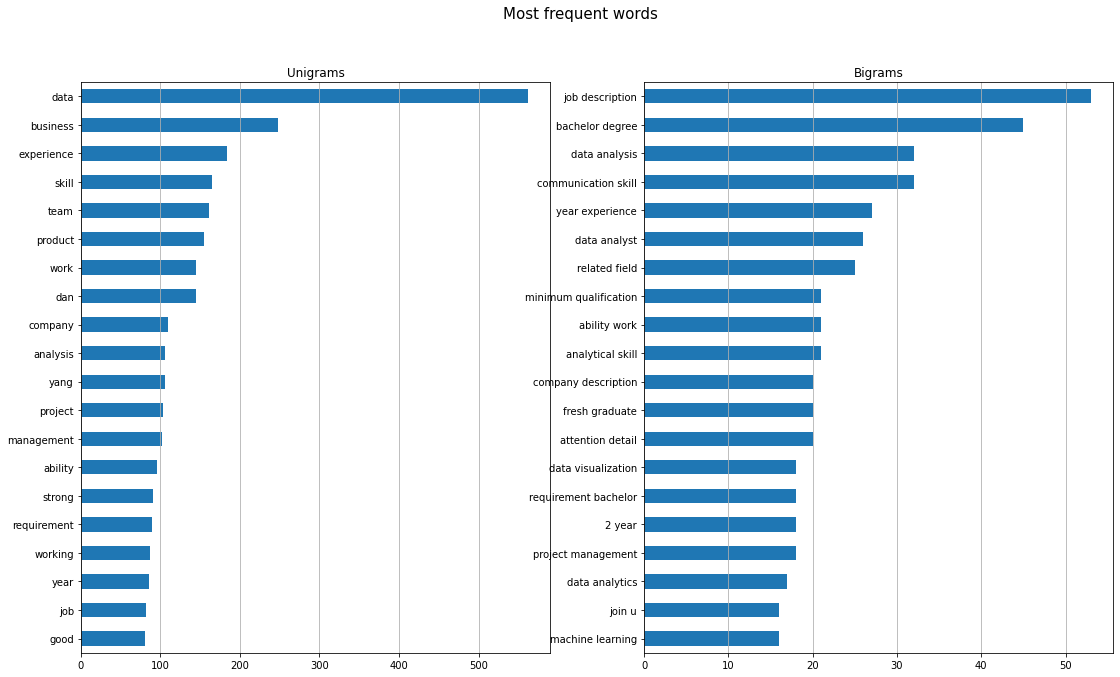

In [51]:
show_word_freq(df, 'Description Clean')